# Regression

In [4]:
import os
import pandas as pd
df =pd.read_csv('gapminder_tidy.csv')
df.head(20)

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia
5,Afghanistan,1969,7.671,36.172,11676990.0,313.0,1178.0,South Asia
6,Afghanistan,1970,7.671,36.663,11964906.0,307.8,1174.0,South Asia
7,Afghanistan,1971,7.671,37.143,12273101.0,302.1,1092.0,South Asia
8,Afghanistan,1972,7.671,37.614,12593688.0,296.4,1046.0,South Asia
9,Afghanistan,1973,7.671,38.075,12915499.0,290.8,1137.0,South Asia


In [20]:
# Decide whats the y and the x are.
df = df.dropna()
x = df[["Year","life"]]
y = df.gdp

In [21]:
# validation split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =12)

x_train.shape,x_test.shape,y_test.shape,y_train.shape,df.shape

((7068, 2), (1768, 2), (1768,), (7068,), (8836, 8))

In [22]:
# initialize our ML model
from sklearn.linear_model import LinearRegression,LogisticRegression

# intialize
model = LinearRegression()
# fit the model

model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# test our model
from sklearn.metrics import mean_absolute_error as mae
# create predictions
preds = model.predict(x_test)

preds[:10]

array([21799.66647309,  8193.70708274,  9665.85120432, 11688.69261479,
       22850.47766053, 21073.95059675,  6320.43917907, 17178.75089993,
        -524.65393987,  9783.96861367])

In [27]:
y_test[:10]

9198    10235.0
2611     5448.0
6618     4493.0
7729     2190.0
6410    22873.0
8129    16748.0
9024     1415.0
1879     8052.0
9327      767.0
5795     3233.0
Name: gdp, dtype: float64

In [28]:
mae(preds,y_test)

8618.070931709264

# Classification

In [64]:
dx = pd.read_csv("iris.csv")
dx.columns = ["PL","PW","SL","SW","Species"]
dx.head()
dx.shape

(149, 5)

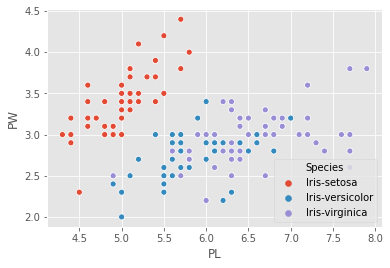

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")
sns.scatterplot(data = dx,x = "PL",y ="PW",hue = "Species")

In [56]:
# split the data

from sklearn.model_selection import train_test_split
x = dx[["PL","PW","SL","SW"]]
y =dx.Species#[0 if i =='Iris-setosa' else 1 if i== 'Iris-versicolor' else 2  for i in dx.Species]

x_train,x_test,y_train,y_test =train_test_split(x,y)

In [58]:
# initalize the model

from sklearn.linear_model import LogisticRegression as LR

model1 = LR()
model1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
# test the model
from sklearn.metrics import accuracy_score,confusion_matrix

preds = model1.predict(x_test)
preds[:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [61]:
y_test[:10]

31        Iris-setosa
0         Iris-setosa
99     Iris-virginica
67    Iris-versicolor
32        Iris-setosa
57    Iris-versicolor
89    Iris-versicolor
53    Iris-versicolor
23        Iris-setosa
86    Iris-versicolor
Name: Species, dtype: object

In [62]:
accuracy_score(preds,y_test)

1.0

In [68]:

pd.DataFrame(confusion_matrix(preds,y_test),columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
             index = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])


,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,14,0,0
Iris-versicolor,0,13,0
Iris-virginica,0,0,11


In [67]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# PCA ANALYSIS

In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)

from sklearn.decomposition import PCA

pca = PCA()
final = pca.fit_transform(scaled)



Text(0, 0.5, 'information in the columns')

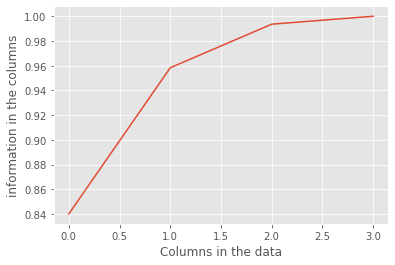

In [82]:
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Columns in the data")
plt.ylabel("information in the columns")

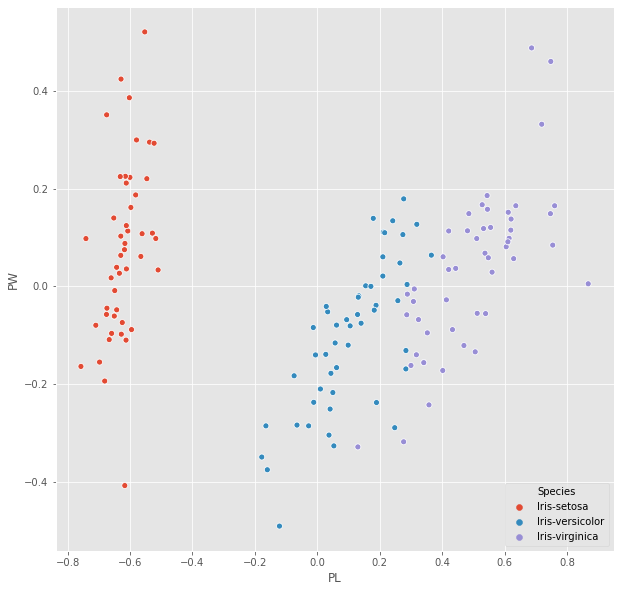

In [88]:
pc = pd.DataFrame(final,columns = ["PL","PW","SL","SW"])
pc["Species"] =dx.Species
plt.figure(figsize =(10.,10))
sns.scatterplot(data = pc,x = "PL",y ="PW",hue = "Species")
plt.show()

In [89]:
pca.explained_variance_ratio_

array([0.84013148, 0.11820244, 0.03525228, 0.0064138 ])

# Visualizing how the model split the data

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [107]:
Y = [1 if i =='Iris-setosa' else 2 if i== 'Iris-versicolor' else 3  for i in dx.Species]
Y[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

## Logistic Regression

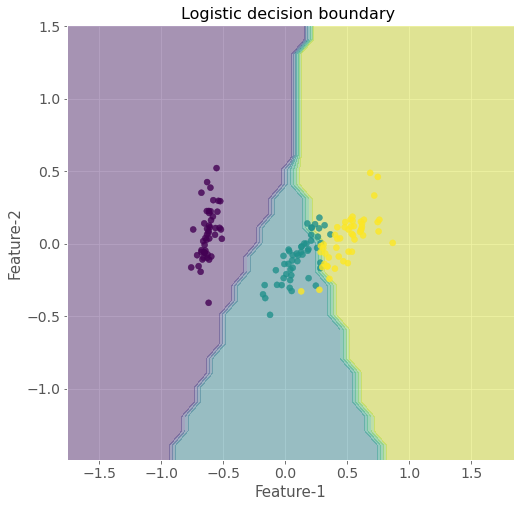

In [110]:

plt.figure(figsize=(8,8))
plt.title("Logistic decision boundary ",fontsize=16)
plot_decision_boundaries(pc[["PL","PW"]],
                         Y,LogisticRegression)
plt.savefig("KNN.jpg")
plt.show()

## Other Classifier (Gradient Boost Classifier)

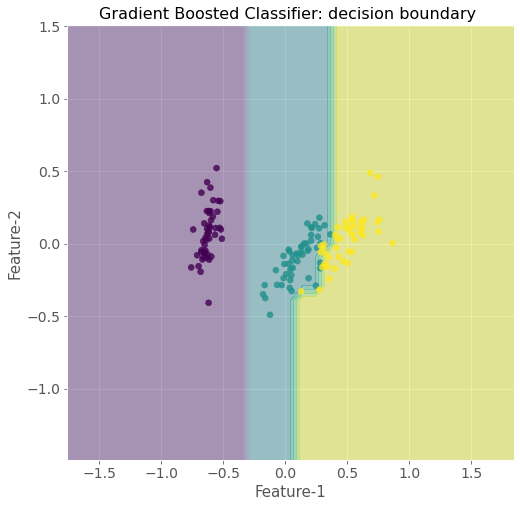

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
plt.figure(figsize=(8,8))
plt.title("Gradient Boosted Classifier: decision boundary ",fontsize=16)
plot_decision_boundaries(pc[["PL","PW"]],
                         Y,GradientBoostingClassifier)
plt.savefig("KNN.jpg")
plt.show()

## Other Classifiers (Support Vector Machine)

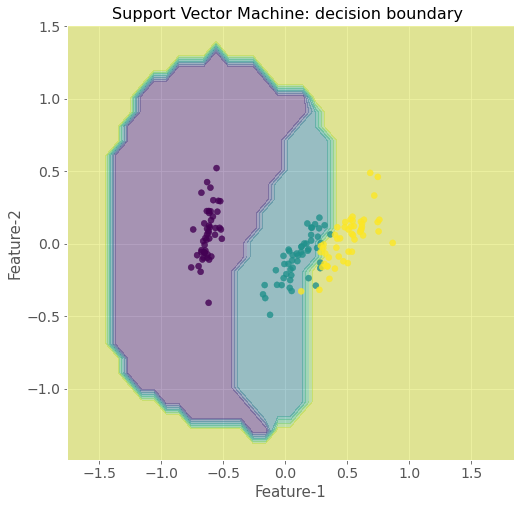

In [114]:
from sklearn.svm import SVC
plt.figure(figsize=(8,8))
plt.title("Support Vector Machine: decision boundary ",fontsize=16)
plot_decision_boundaries(pc[["PL","PW"]],
                         Y,SVC)
plt.savefig("KNN.jpg")
plt.show()